In [ ]:
import numpy as np
np.set_printoptions(threshold=np.inf)
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics.pairwise import haversine_distances
!pip install haversine
import haversine as hs
from math import radians
from collections import Counter as counter
import folium
import random
import math
from sklearn.datasets import make_blobs 
import matplotlib.colors
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import sklearn.datasets as dt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data = pd.read_csv("/content/data_update.csv")
X = data.iloc[:,:-1]
dataset_new = data[['latitude', 
                       'lontitude']].values
print(X)

       latitude   lontitude  Workload  Latency  Max_Distance  Capacity
0     30.903041  121.922883         4  0.02203         6.609       NaN
1     30.956183  121.908274         5  0.02726         8.178       NaN
2     30.988441  121.874860         7  0.02364         7.092       NaN
3     30.988441  121.874860         4  0.02150         6.450       NaN
4     30.933365  121.873737         4  0.01963         5.889       NaN
...         ...         ...       ...      ...           ...       ...
6182  30.893975  121.016922         9  0.02295         6.885       NaN
6183  30.893975  121.016922         4  0.02039         6.117       NaN
6184  30.893975  121.016922         1  0.01309         3.927       NaN
6185  30.930023  121.011969         5  0.01885         5.655       NaN
6186  31.099755  121.009542         2  0.01773         5.319       NaN

[6187 rows x 6 columns]


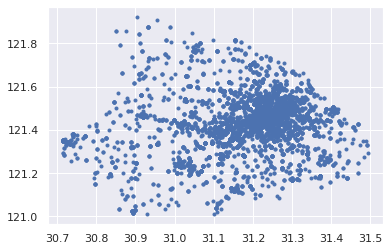

In [ ]:
plt.scatter(data['latitude'], data['lontitude'], marker = '.') #setting up for visualization
plt.show()

In [ ]:

kmeans = KMeans(10)
kmeans.fit(dataset_new)

KMeans(n_clusters=10)

In [ ]:
centroid = kmeans.cluster_centers_
print(centroid)

[[ 31.05677171 121.17660436]
 [ 31.21126073 121.48788898]
 [ 30.80401516 121.31124836]
 [ 31.01042941 121.72850006]
 [ 31.14217461 121.36853352]
 [ 31.29793683 121.38439282]
 [ 30.98844731 121.46250594]
 [ 31.19929307 121.63520568]
 [ 31.30315404 121.51434141]
 [ 31.33060822 121.22883554]]


Text(0, 0.5, 'WCSS')

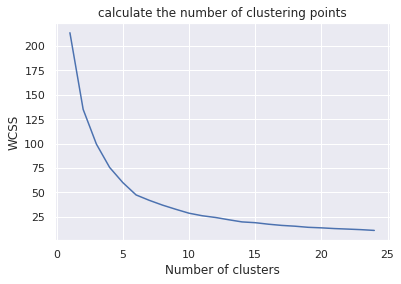

In [ ]:
  wcss=[]   #Method to calculate the number of clustering points
  for i in range(1,25):
    kmeans = KMeans(i)
    kmeans.fit(dataset_new)
    wcss_iter = kmeans.inertia_
    wcss.append(wcss_iter)

  number_clusters = range(1,25) #getting the square matrix for display
  plt.plot(number_clusters,wcss)
  plt.title('calculate the number of clustering points')
  plt.xlabel('Number of clusters')
  plt.ylabel('WCSS')

For n_clusters=2, Silhouette Coefficient = 0.3904628143871489
For n_clusters=3, Silhouette Coefficient = 0.3544094800848923
For n_clusters=4, Silhouette Coefficient = 0.37810707912429065
For n_clusters=5, Silhouette Coefficient = 0.39930310800772767
For n_clusters=6, Silhouette Coefficient = 0.42095648765081295
For n_clusters=7, Silhouette Coefficient = 0.39274248109948784
For n_clusters=8, Silhouette Coefficient = 0.3752892444617061
For n_clusters=9, Silhouette Coefficient = 0.3811819729665865
For n_clusters=10, Silhouette Coefficient = 0.39808280738422774
For n_clusters=11, Silhouette Coefficient = 0.4007760787943638
For n_clusters=12, Silhouette Coefficient = 0.4098115203547311
For n_clusters=13, Silhouette Coefficient = 0.40733919097881294
For n_clusters=14, Silhouette Coefficient = 0.40769156852281335
For n_clusters=15, Silhouette Coefficient = 0.40149771309763443
For n_clusters=16, Silhouette Coefficient = 0.3968228837909518
For n_clusters=17, Silhouette Coefficient = 0.401909733

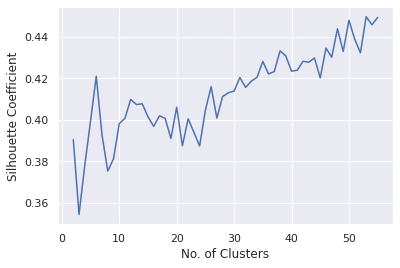

In [ ]:
limit = int((dataset_new.shape[0]//2)**0.5)
k_clusters = []
sil_coeffecients = []

# determing number of clusters
# using silhouette score method
for k in range(2, limit+1):
    kmeans = KMeans(k).fit(dataset_new)
    label = kmeans.labels_
    sil_coeff = silhouette_score(dataset_new, label)
    print("For n_clusters={}, Silhouette Coefficient = {}".format(k, sil_coeff))
    sil_coeffecients.append(sil_coeff)
    k_clusters.append(k)

plt.plot(k_clusters, sil_coeffecients)
plt.ylabel('Silhouette Coefficient'), plt.xlabel('No. of Clusters')
plt.show()

In [ ]:

#Euclidian Distance between two d-dimensional points
def eucldist(p0,p1):
    dist = 0.0
    for i in range(0,len(p0)):
        dist += (p0[i] - p1[i])**2
    return math.sqrt(dist)

#haversine_distances
def haversine_distance(p0,p1):
    dist_h=0.0
    for i in range(0,len(p0)):
      p0_rads= [radians(_) for _ in p0]
      p1_rads= [radians(_) for _ in p1]
      dist_h = hs.haversine(p0_rads,p1_rads)
    return dist_h*6371
     

In [ ]:
def kmeans(k,dataset_new):

    # d - Dimensionality of Datapoints
    d = len(dataset_new[0]) 

    #Limit our iterations
    Max_Iterations = 1000
    i = 0

    cluster = [0] * len(dataset_new)
    prev_cluster = [-1] * len(dataset_new)

    #Randomly Choose Centers for the Clusters
    cluster_centers = []
    for i in range(0,k):
        new_cluster = []
        #for i in range(0,d):
        #    new_cluster += [random.randint(0,10)]
        cluster_centers.append(random.choice(dataset_new))

        force_recalculation = False

    while (cluster != prev_cluster) or (i > Max_Iterations) or (force_recalculation) :

        prev_cluster = list(cluster)
        # force_recalculation = False
        i += 1

        #Update Point's Cluster Allegiance
        for p in range(0,len(dataset_new)):
            min_dist = 0.1
            #Check min_distance against all centers
            for c in range(0,len(cluster_centers)):

                # dist = haversine_distance(dataset_new[p],cluster_centers[c])
                dist_h = eucldist(dataset_new[p],cluster_centers[c])

                if (dist_h < min_dist):
                    min_dist = dist_h
                    print(min_dist)  
                    cluster[p] = c   # Reassign Point to new Cluster


        #Update Cluster's Position
        for k in range(0,len(cluster_centers)):
            new_center = [0] * d
            members = 0
            for p in range(0,len(dataset_new)):
                if (cluster[p] == k): #If this point belongs to the cluster
                    for j in range(0,d):
                        new_center[j] += dataset_new[p][j]
                    members += 1

            for j in range(0,d):
                if members != 0:
                    new_center[j] = new_center[j] / float(members) 

                #This means that our initial random assignment was poorly chosen
                #Change it to a new datapoint to actually force k clusters
                else: 
                    new_center = random.choice(dataset_new)
                    # force_recalculation = True
                    # print("Forced Recalculation...")


            cluster_centers[k] = tuple(new_center)


    # print("======== Results ========")
    # print("Iterations",i)
    print("Assignments", cluster)
    for i in set(cluster):
      print(f'{i}: {cluster.count(i)}')
    return cluster_centers

Streaming output truncated to the last 5000 lines.
0.07968120250820443
0.03393741275460997
0.08915171446978669
0.07968120250820443
0.03393741275460997
0.08915171446978669
0.07968120250820443
0.03393741275460997
0.08915171446978669
0.07968120250820443
0.03393741275460997
0.08915171446978669
0.07968120250820443
0.03393741275460997
0.08915171446978669
0.07968120250820443
0.03393741275460997
0.08915171446978669
0.07968120250820443
0.03393741275460997
0.08915171446978669
0.07968120250820443
0.03393741275460997
0.08915171446978669
0.07968120250820443
0.03393741275460997
0.08915171446978669
0.07968120250820443
0.03393741275460997
0.08915171446978669
0.07968120250820443
0.03393741275460997
0.08915171446978669
0.07968120250820443
0.03393741275460997
0.08915171446978669
0.07968120250820443
0.03393741275460997
0.06327606758583888
0.04816709708730374
0.06327606758583888
0.04816709708730374
0.06327606758583888
0.04816709708730374
0.06327606758583888
0.04816709708730374
0.028121593357294722
0.060588

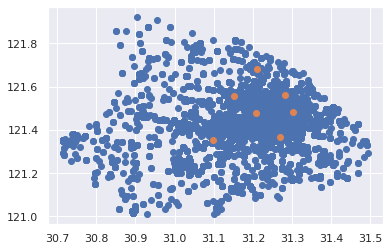

In [ ]:

if __name__ == "__main__":
    #2D - Datapoints List of n d-dimensional vectors. (For this example I already set up 2D Tuples)
    #Feel free to change to whatever size tuples you want...

  k = 7 # K - Number of Clusters
  lst = list(kmeans(k,dataset_new))
  print(lst, end = " ")
  print('/n')
  plt.scatter(*zip(*dataset_new))
  plt.scatter(*zip(*lst))
  plt.show()
  # fre = counter(lst)

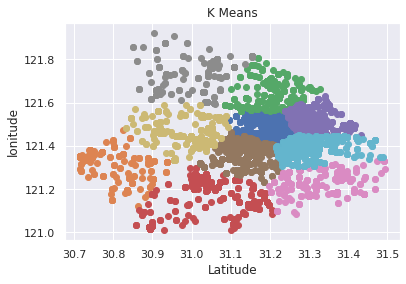

In [ ]:

model = KMeans(n_clusters=10)  
pred = model.fit_predict(dataset_new)

for i in np.unique(model.labels_):
    plt.scatter(dataset_new[pred==i, 0],
                dataset_new[pred==i, 1],
                cmap = 'hsv')
      

  
plt.title('K Means')
plt.xlabel('Latitude')
plt.ylabel('lonitude')
plt.show()

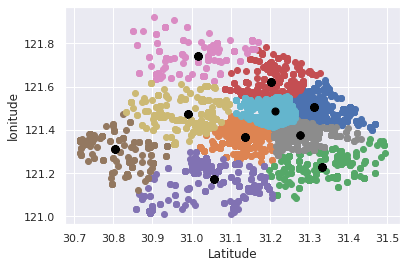

In [ ]:
model = KMeans(n_clusters=10)  
pred = model.fit_predict(dataset_new)

for i in np.unique(model.labels_):
    plt.scatter(dataset_new[pred==i, 0],
                dataset_new[pred==i, 1],
                cmap = 'hsv')
    plt.scatter(model.cluster_centers_[:, 0], 
            model.cluster_centers_[:, 1], 
            s = 50,  
            c = 'black')

plt.title('')
plt.xlabel('Latitude')
plt.ylabel('lonitude')
plt.show()
